In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score

In [2]:
data=pd.read_csv(r"C:\Users\TNF\Desktop\thesis\network-intrusion-detection-system-project\Train_data.csv")

In [3]:
data.drop(['num_outbound_cmds'], axis=1, inplace=True)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

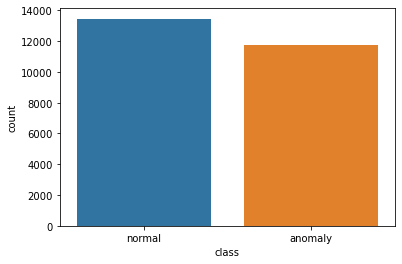

In [4]:
sns.countplot(data['class'])

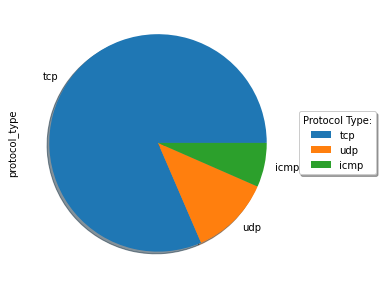

In [5]:
data['protocol_type'].value_counts().plot(kind='pie',figsize=(8,5),shadow=True)
plt.legend(title = "Protocol Type:",loc='center left',bbox_to_anchor=(1, 0, 0.5, 1),shadow=True)

<AxesSubplot:>

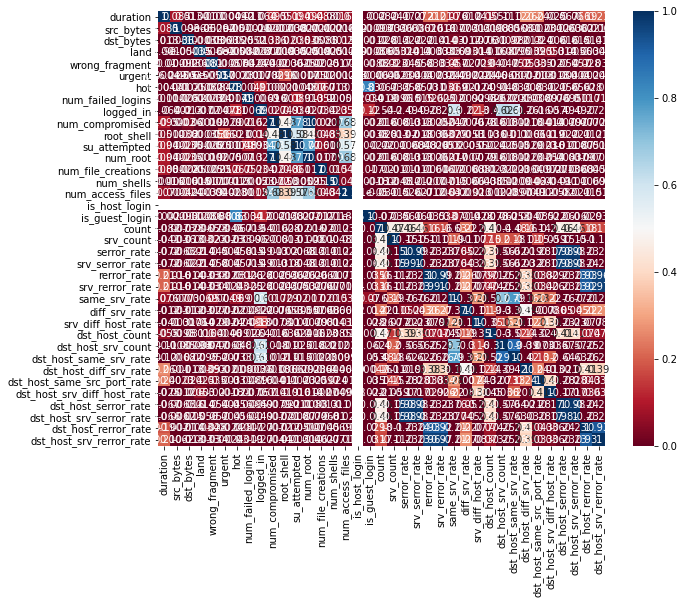

In [6]:
plt.figure(figsize=(10,8))
heat_map = sns.heatmap(data.corr(), annot=True,cmap="RdBu",vmin=0, vmax=1 )
heat_map

In [7]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [8]:
data['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [9]:
label_encoder=preprocessing.LabelEncoder()

data['protocol_type']= label_encoder.fit_transform(data['protocol_type'])

data['protocol_type'].unique()

array([1, 2, 0])

In [10]:
data['service'].unique()

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001'], dtype=object)

In [11]:
label_encoder=preprocessing.LabelEncoder()
data['service']= label_encoder.fit_transform(data['service'])
data['service'].unique()

array([19, 41, 46, 22, 48, 33, 35, 13, 32, 57, 17, 11, 55, 63,  2, 51,  6,
       62, 34, 61,  3, 10, 18,  4, 29, 14, 20, 64, 56, 23, 15, 65, 25, 26,
       12, 27, 30, 54, 31, 28, 52, 59, 21, 16, 40,  9, 39,  5,  7, 53,  8,
       50, 37, 44, 38,  0, 43, 45, 58, 42, 47, 36, 49,  1, 60, 24])

In [12]:
data['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [13]:
label_encoder=preprocessing.LabelEncoder()

data['flag']= label_encoder.fit_transform(data['flag'])

data['flag'].unique()

array([ 9,  5,  1,  4, 10,  2,  6,  3,  8,  7,  0])

In [14]:
x=data.drop('class', axis=1)
y=data['class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)

In [15]:
len(x_train)

12596

In [16]:
len(y_train)

12596

# Decission tree


In [17]:
%%time
dt=tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)

Wall time: 130 ms


In [18]:
nb=dt.score(x_test,y_test)
m1=nb*100
print("Accuracy: ",m1)

Accuracy:  99.48396316290886


In [19]:
score1=accuracy_score(y_test, y_pred) * 100 #score
print("Accuracy using desicion Tree: ", round(score1, 1), "%" )

Accuracy using desicion Tree:  99.5 %


In [20]:
error1=np.mean(y_pred != y_test) # error rate
error1

0.005160368370911401

Confusion Matrix:
 [[5876   33]
 [  32 6655]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      5909
      normal       1.00      1.00      1.00      6687

    accuracy                           0.99     12596
   macro avg       0.99      0.99      0.99     12596
weighted avg       0.99      0.99      0.99     12596



<AxesSubplot:>

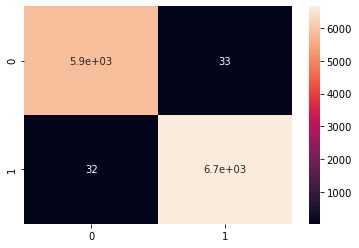

In [21]:
cm1=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm1)
cr1=classification_report(y_test, y_pred)
print("Classification Report:\n",cr1)
sns.heatmap(cm1, annot=True)

In [22]:
# import time

# def procedure():
#    time.sleep(2.5)

# # measure process time
# t0 = time.clock()
# procedure()
# print (time.clock())

# # measure wall time
# t0 = time.time()
# procedure()
# print (time.time() - t0)

# Multi-layer perceptron


In [23]:
%%time
mlp=MLPClassifier()
mlp.fit(x_train, y_train)
y_pred=mlp.predict(x_test)

Wall time: 5.85 s


In [24]:
nb=mlp.score(x_test,y_test)
m2=nb*100
print("Accuracy: ",m2)

Accuracy:  93.65671641791045


In [25]:
score2=accuracy_score(y_test, y_pred) * 100
print("Accuracy using multi-layer precission: ", round(score2, 1), "%" )

Accuracy using multi-layer precission:  93.7 %


In [26]:
error2=np.mean(y_pred != y_test) # error rate
error2

0.06343283582089553

Confusion Matrix:
 [[5813   96]
 [ 703 5984]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.89      0.98      0.94      5909
      normal       0.98      0.89      0.94      6687

    accuracy                           0.94     12596
   macro avg       0.94      0.94      0.94     12596
weighted avg       0.94      0.94      0.94     12596



<AxesSubplot:>

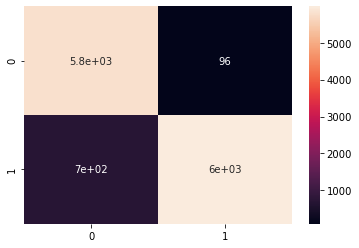

In [27]:
cm2=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm2)
cr2=classification_report(y_test, y_pred)
print("Classification Report:\n",cr2)
sns.heatmap(cm2, annot=True)

# Neural Network

In [28]:
%%time
nn=MLPClassifier()
nn.fit(x_train, y_train)
y_pred=nn.predict(x_test)

Wall time: 4.91 s


In [29]:
nb=nn.score(x_test,y_test)
m3=nb*100
print("Accuracy: ",m3)

Accuracy:  92.68815496983169


In [30]:
score3=accuracy_score(y_test, y_pred) * 100
print("Accuracy using neural network: ", round(score3, 1), "%" )

Accuracy using neural network:  92.7 %


In [31]:
error3=np.mean(y_pred != y_test) # error rate
error3

0.07311845030168307

Confusion Matrix:
 [[5179  730]
 [ 191 6496]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.96      0.88      0.92      5909
      normal       0.90      0.97      0.93      6687

    accuracy                           0.93     12596
   macro avg       0.93      0.92      0.93     12596
weighted avg       0.93      0.93      0.93     12596



<AxesSubplot:>

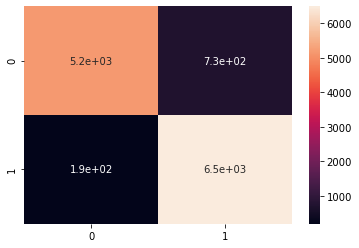

In [32]:
cm3=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm3)
cr3=classification_report(y_test, y_pred)
print("Classification Report:\n",cr3)
sns.heatmap(cm3, annot=True)

# Random Forest

In [33]:
%%time
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

Wall time: 1.27 s


In [34]:
nb=rf.score(x_test,y_test)
m4=nb*100
print("Accuracy: ",m4)

Accuracy:  99.61892664337884


In [35]:
score4 = accuracy_score(y_test, y_pred) * 100
print("Accuracy using random forest: ", round(score4, 1), "%" )

Accuracy using random forest:  99.6 %


In [36]:
error4=np.mean(y_pred != y_test) # error rate
error4

0.003810733566211496

Confusion Matrix:
 [[5870   39]
 [   9 6678]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      5909
      normal       0.99      1.00      1.00      6687

    accuracy                           1.00     12596
   macro avg       1.00      1.00      1.00     12596
weighted avg       1.00      1.00      1.00     12596



<AxesSubplot:>

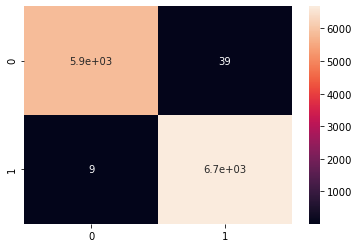

In [37]:
cm4= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm4)
cr4=classification_report(y_test, y_pred)
print("Classification Report:\n",cr4)
sns.heatmap(cm4, annot=True)

# K-Nearest Neighbors

In [38]:
%%time
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)

Wall time: 2.13 s


In [39]:
nb=knn.score(x_test,y_test)
m5=nb*100
print("Accuracy: ",m5)

Accuracy:  98.49158463004129


In [40]:
score5=accuracy_score(y_test, y_pred) * 100
print("Accuracy using kneighbours: ", round(score5, 1), "%" )

Accuracy using kneighbours:  98.5 %


In [41]:
error5=np.mean(y_pred != y_test) # error rate
error5

0.01508415369958717

Confusion Matrix:
 [[5809  100]
 [  90 6597]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98      5909
      normal       0.99      0.99      0.99      6687

    accuracy                           0.98     12596
   macro avg       0.98      0.98      0.98     12596
weighted avg       0.98      0.98      0.98     12596



<AxesSubplot:>

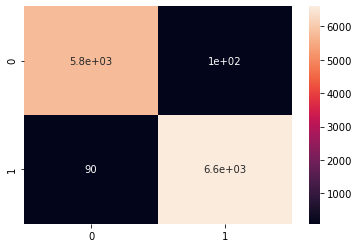

In [42]:
cm5=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm5)
cr5=classification_report(y_test, y_pred)
print("Classification Report:\n",cr5)
sns.heatmap(cm5, annot=True)

# Naive Bayes

In [43]:
%%time
nby=BernoulliNB()
nby.fit(x_train, y_train)
y_pred=nby.predict(x_test)

Wall time: 72.4 ms


In [44]:
nb=nby.score(x_test,y_test)
m6=nb*100
print("Accuracy: ",m6)

Accuracy:  89.66338520165131


In [45]:
score6=accuracy_score(y_test, y_pred) * 100
print("Accuracy using naive bayes: ", round(score6, 1), "%" )

Accuracy using naive bayes:  89.7 %


In [46]:
error6=np.mean(y_pred != y_test) # error rate
error6

0.10336614798348683

Confusion Matrix:
 [[4992  917]
 [ 385 6302]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.93      0.84      0.88      5909
      normal       0.87      0.94      0.91      6687

    accuracy                           0.90     12596
   macro avg       0.90      0.89      0.90     12596
weighted avg       0.90      0.90      0.90     12596



<AxesSubplot:>

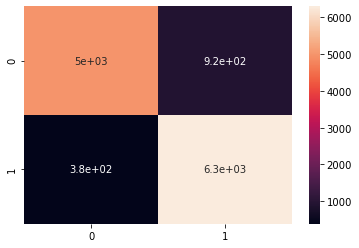

In [47]:
cm6=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm6)
cr6=classification_report(y_test, y_pred)
print("Classification Report:\n",cr6)
sns.heatmap(cm6, annot=True)

# Support vector machine

In [48]:
%%time
svm=SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

Wall time: 29.6 s


In [49]:
nb=svm.score(x_test,y_test)
m7=nb*100
print("Accuracy: ",m7)

Accuracy:  89.20292156240076


In [50]:
score7=accuracy_score(y_test, y_pred) * 100
print("Accuracy using support vector machine: ", round(score7, 1), "%" )

Accuracy using support vector machine:  89.2 %


In [51]:
error7=np.mean(y_pred != y_test) # error rate
error7

0.10797078437599238

Confusion Matrix:
 [[5538  371]
 [ 989 5698]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.85      0.94      0.89      5909
      normal       0.94      0.85      0.89      6687

    accuracy                           0.89     12596
   macro avg       0.89      0.89      0.89     12596
weighted avg       0.90      0.89      0.89     12596



<AxesSubplot:>

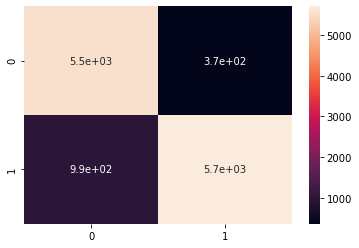

In [52]:
cm7=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm7)
cr7=classification_report(y_test, y_pred)
print("Classification Report:\n",cr7)
sns.heatmap(cm7, annot=True)

# Logistic regression

In [53]:
%%time
lr= LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

Wall time: 314 ms


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
nb=lr.score(x_test,y_test)
m8=nb*100
print("Accuracy: ",m8)

Accuracy:  87.567481740235


In [55]:
score8=accuracy_score(y_test, y_pred) * 100
print("Accuracy using support vector machine: ", round(score8, 1), "%" )

Accuracy using support vector machine:  87.6 %


In [56]:
error8=np.mean(y_pred != y_test) # error rate
error8

0.12432518259765005

Confusion Matrix:
 [[5014  895]
 [ 671 6016]]
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.88      0.85      0.86      5909
      normal       0.87      0.90      0.88      6687

    accuracy                           0.88     12596
   macro avg       0.88      0.87      0.87     12596
weighted avg       0.88      0.88      0.88     12596



<AxesSubplot:>

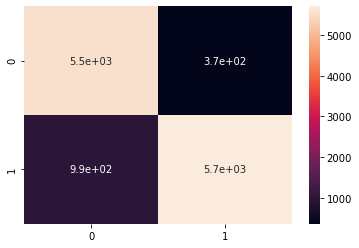

In [57]:
cm8=confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm8)
cr8=classification_report(y_test, y_pred)
print("Classification Report:\n",cr8)
sns.heatmap(cm7, annot=True)

# finalize result


In [58]:
algorithms=["DT","MLP","NN","RF","KNN","NBY","SVM","LR"]
scores=[score1,score2,score3,score4,score5,score6,score7,score8]
errors=[error1,error2,error3,error4,error5,error6,error7,error8]

In [59]:
accuracy=pd.DataFrame(scores,algorithms)
accuracy.columns=['Accuracy']
error=pd.DataFrame(errors,algorithms)
error.columns=['Error']

In [60]:
pd.concat([accuracy, error],axis=1)

,Accuracy,Error
DT,99.483963,0.005160
MLP,93.656716,0.063433
NN,92.688155,0.073118
RF,99.618927,0.003811
KNN,98.491585,0.015084
NBY,89.663385,0.103366
SVM,89.202922,0.107971
LR,87.567482,0.124325


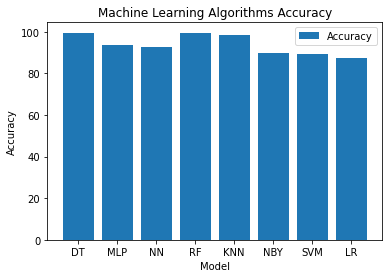

In [61]:
plt.bar(algorithms,scores, label="Accuracy")
plt.legend()
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Machine Learning Algorithms Accuracy')
plt.show()

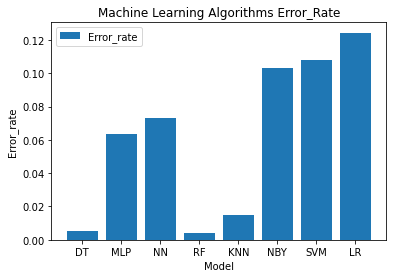

In [62]:
plt.bar(algorithms,errors, label="Error_rate")
plt.legend()
plt.xlabel('Model')
plt.ylabel('Error_rate')
plt.title('Machine Learning Algorithms Error_Rate')
plt.show()